Code for Volume,Speed-RL Algo

This code implements a simple traffic signal control problem and calculates the optimal policy using the value iteration algorithm. The goal is to determine the best action (green light direction) for each state (traffic conditions) to maximize the cumulative rewards.

In [1]:
import random

data = []
for i in range(10):
    volume = random.randint(0, 100)
    speed = random.uniform(0, 60)
    status = i % 2  # alternates between 0 and 1
    data.append((volume, speed, status))

states = set(data)
print(states)

{(41, 24.725667126139903, 1), (17, 0.9924981786899578, 0), (20, 54.04720975333326, 1), (24, 7.844846584142051, 0), (88, 52.851304365783825, 0), (67, 13.186537127895054, 1), (40, 33.383900302264884, 0), (57, 33.301067105882005, 1), (20, 7.541848901005606, 0), (13, 4.3410981231236345, 1)}


In [2]:
actions = {'green for NS direction', 'green for EW direction'}

print(actions)

{'green for EW direction', 'green for NS direction'}


In [3]:
transitions = {}
for state in states:
    for action in actions:
        # Calculate the possible next states
        next_states = []
        if action == 'green for NS direction':
            # Calculate the probability of transitioning to each possible next state
            for next_state in states:
                if next_state[0] >= state[0] and next_state[2] == 0:
                    next_states.append(next_state)
            p = 1.0 / len(next_states) if len(next_states) > 0 else 0
            # Add the transition probability to the dictionary
            transitions[(state, action, next_state)] = p
        elif action == 'green for EW direction':
            # Calculate the probability of transitioning to each possible next state
            for next_state in states:
                if next_state[1] >= state[1] and next_state[2] == 1:
                    next_states.append(next_state)
            p = 1.0 / len(next_states) if len(next_states) > 0 else 0
            # Add the transition probability to the dictionary
            transitions[(state, action, next_state)] = p

print(transitions)

{((41, 24.725667126139903, 1), 'green for EW direction', (13, 4.3410981231236345, 1)): 0.3333333333333333, ((41, 24.725667126139903, 1), 'green for NS direction', (13, 4.3410981231236345, 1)): 1.0, ((17, 0.9924981786899578, 0), 'green for EW direction', (13, 4.3410981231236345, 1)): 0.2, ((17, 0.9924981786899578, 0), 'green for NS direction', (13, 4.3410981231236345, 1)): 0.2, ((20, 54.04720975333326, 1), 'green for EW direction', (13, 4.3410981231236345, 1)): 1.0, ((20, 54.04720975333326, 1), 'green for NS direction', (13, 4.3410981231236345, 1)): 0.25, ((24, 7.844846584142051, 0), 'green for EW direction', (13, 4.3410981231236345, 1)): 0.25, ((24, 7.844846584142051, 0), 'green for NS direction', (13, 4.3410981231236345, 1)): 0.3333333333333333, ((88, 52.851304365783825, 0), 'green for EW direction', (13, 4.3410981231236345, 1)): 1.0, ((88, 52.851304365783825, 0), 'green for NS direction', (13, 4.3410981231236345, 1)): 1.0, ((67, 13.186537127895054, 1), 'green for EW direction', (13, 

In [4]:
rewards = {}
for state in states:
    for action in actions:
        # Calculate the possible next states
        next_states = []
        if action == 'green for NS direction':
            # Calculate the probability of transitioning to each possible next state
            # Checks if the next state is reachable from the current state by moving North-South
            #and the intersection is not currently allowing East-West traffic to pass through.
            for next_state in states:
                if next_state[0] >= state[0] and next_state[2] == 0:
                    next_states.append(next_state)
            # Define the reward for each possible next state
            for next_state in next_states:
                r = 10
                if next_state[2] == 1:
                    r -= 10
                r -= next_state[0] * 0.1
                r -= next_state[1] * 0.01
                # Add the reward to the dictionary
                rewards[(state, action, next_state)] = r
        elif action == 'green for EW direction':
            # Calculate the probability of transitioning to each possible next state
            for next_state in states:
                if next_state[1] >= state[1] and next_state[2] == 1:
                    next_states.append(next_state)
            # Define the reward for each possible next state
            for next_state in next_states:
                r = 10
                if next_state[2] == 0:
                    r -= 10
                r -= next_state[0] * 0.1
                r -= next_state[1] * 0.01
                # Add the reward to the dictionary
                rewards[(state, action, next_state)] = r

print(rewards)

{((41, 24.725667126139903, 1), 'green for EW direction', (41, 24.725667126139903, 1)): 5.6527433287386, ((41, 24.725667126139903, 1), 'green for EW direction', (20, 54.04720975333326, 1)): 7.459527902466667, ((41, 24.725667126139903, 1), 'green for EW direction', (57, 33.301067105882005, 1)): 3.96698932894118, ((41, 24.725667126139903, 1), 'green for NS direction', (88, 52.851304365783825, 0)): 0.671486956342161, ((17, 0.9924981786899578, 0), 'green for EW direction', (41, 24.725667126139903, 1)): 5.6527433287386, ((17, 0.9924981786899578, 0), 'green for EW direction', (20, 54.04720975333326, 1)): 7.459527902466667, ((17, 0.9924981786899578, 0), 'green for EW direction', (67, 13.186537127895054, 1)): 3.1681346287210492, ((17, 0.9924981786899578, 0), 'green for EW direction', (57, 33.301067105882005, 1)): 3.96698932894118, ((17, 0.9924981786899578, 0), 'green for EW direction', (13, 4.3410981231236345, 1)): 8.656589018768763, ((17, 0.9924981786899578, 0), 'green for NS direction', (17, 

In [5]:
gamma = 0.8
convergence_threshold = 0.0001

In [6]:
V = {state: 0 for state in states}
while True:
    delta = 0
    for state in states:
        v = V[state]
        max_value = float('-inf')
        for action in actions:
            action_value = 0
            for next_state, probability in transitions.get((state, action), {}).items():
                action_value += probability * (rewards.get((state, action, next_state), 0) + gamma * V[next_state])
            if action_value > max_value:
                max_value = action_value
                best_action = action
        V[state] = max_value
        delta = max(delta, abs(v - V[state]))
    if delta < convergence_threshold:
        break

# Extract the optimal policy
policy = {}
for state in states:
    max_value = float('-inf')
    for action in actions:
        action_value = 0
        for next_state, probability in transitions.get((state, action), {}).items():
            action_value += probability * (rewards.get((state, action, next_state), 0) + gamma * V[next_state])
        if action_value > max_value:
            max_value = action_value
            best_action = action
    policy[state] = best_action

print(policy)

{(41, 24.725667126139903, 1): 'green for EW direction', (17, 0.9924981786899578, 0): 'green for EW direction', (20, 54.04720975333326, 1): 'green for EW direction', (24, 7.844846584142051, 0): 'green for EW direction', (88, 52.851304365783825, 0): 'green for EW direction', (67, 13.186537127895054, 1): 'green for EW direction', (40, 33.383900302264884, 0): 'green for EW direction', (57, 33.301067105882005, 1): 'green for EW direction', (20, 7.541848901005606, 0): 'green for EW direction', (13, 4.3410981231236345, 1): 'green for EW direction'}


In [7]:
import pandas as pd

# Create a DataFrame to represent the optimal policy
df = pd.DataFrame(index=range(10), columns=['Volume', 'Speed', 'Status', 'Optimal Action'])
for i, state in enumerate(states):
    df.loc[i, 'Volume'] = state[0]
    df.loc[i, 'Speed'] = state[1]
    df.loc[i, 'Status'] = 'NS' if state[2] == 0 else 'EW'
    df.loc[i, 'Optimal Action'] = policy[state]

print(df)

  Volume      Speed Status          Optimal Action
0     41  24.725667     EW  green for EW direction
1     17   0.992498     NS  green for EW direction
2     20   54.04721     EW  green for EW direction
3     24   7.844847     NS  green for EW direction
4     88  52.851304     NS  green for EW direction
5     67  13.186537     EW  green for EW direction
6     40    33.3839     NS  green for EW direction
7     57  33.301067     EW  green for EW direction
8     20   7.541849     NS  green for EW direction
9     13   4.341098     EW  green for EW direction


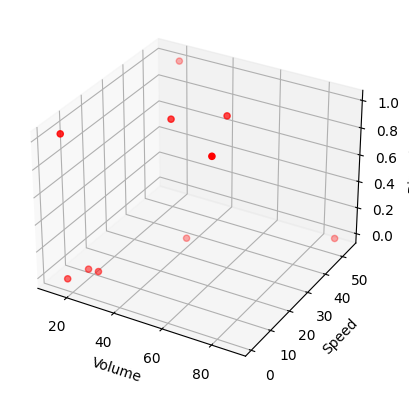

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the data from the DataFrame
x = df['Volume']
y = df['Speed']
z = [0 if s == 'NS' else 1 for s in df['Status']]  # Convert direction to a numerical value (0 or 1)
colors = ['green' if a == 'green for NS direction' else 'red' for a in df['Optimal Action']]  # Color based on optimal action

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors)

# Set the axis labels
ax.set_xlabel('Volume')
ax.set_ylabel('Speed')
ax.set_zlabel('Direction')

plt.show()

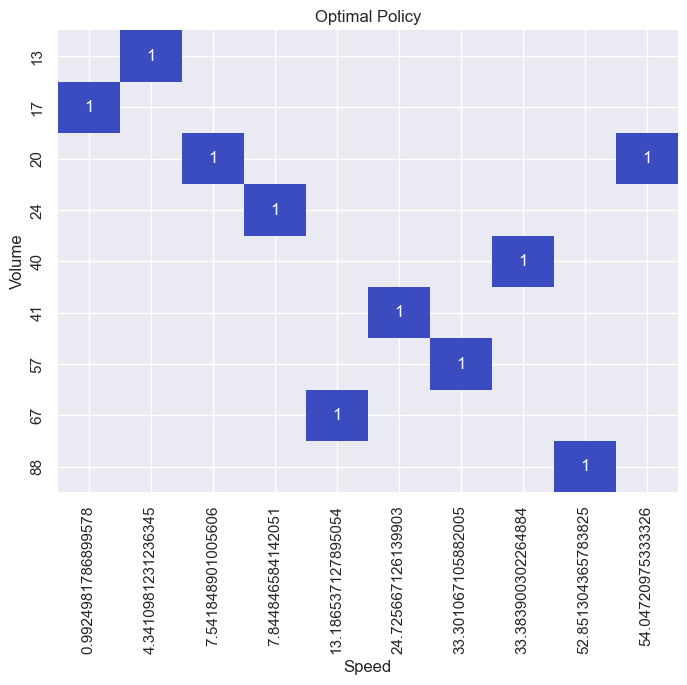

In [9]:
import pandas as pd

# Create a DataFrame to represent the optimal policy
df = pd.DataFrame(index=range(10), columns=['Volume', 'Speed', 'Status', 'Optimal Action'])
for i, state in enumerate(states):
    df.loc[i, 'Volume'] = state[0]
    df.loc[i, 'Speed'] = state[1]
    df.loc[i, 'Status'] = 'NS' if state[2] == 0 else 'EW'
    df.loc[i, 'Optimal Action'] = policy[state]

# Map the actions to numeric values for the heatmap
action_map = {'green for NS direction': 0, 'green for EW direction': 1}
df['Optimal Action'] = df['Optimal Action'].map(action_map)

# Create a pivot table to prepare the data for the heatmap
pivot = df.pivot_table(values='Optimal Action', index='Volume', columns='Speed')

# Create the heatmap using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, cbar=False)
plt.title('Optimal Policy')
plt.show()

HeatMaps

In [10]:
!pip install ultralytics

   ---------------------------------------- 0.0/172.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/172.3 MB ? eta -:--:--
   ---------------------------------------- 1.6/172.3 MB 6.0 MB/s eta 0:00:29
    --------------------------------------- 2.9/172.3 MB 5.6 MB/s eta 0:00:31
   - -------------------------------------- 4.7/172.3 MB 6.5 MB/s eta 0:00:26
   - -------------------------------------- 5.5/172.3 MB 5.8 MB/s eta 0:00:29
   - -------------------------------------- 7.3/172.3 MB 6.4 MB/s eta 0:00:26
   - -------------------------------------- 8.4/172.3 MB 6.7 MB/s eta 0:00:25
   -- ------------------------------------- 10.5/172.3 MB 6.6 MB/s eta 0:00:25
   -- ------------------------------------- 12.1/172.3 MB 6.7 MB/s eta 0:00:24
   --- ------------------------------------ 14.7/172.3 MB 7.4 MB/s eta 0:00:22
   --- ------------------------------------ 17.0/172.3 MB 7.6 MB/s eta 0:00:21
   ---- ----------------------------------- 19.9/172.3 MB 8.2 MB/s eta 0:0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1 requires torch==2.5.1, but you have torch 2.0.1 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from collections import defaultdict
import cv2
import numpy as np
from ultralytics import YOLO

In [12]:
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:04<00:00, 12.6MB/s]


In [13]:
videopath = '/Path/Road traffic video.mp4'
cap = cv2.VideoCapture(videopath)

In [14]:
track_history = defaultdict(lambda: [])
last_positions = {}

In [15]:
def calculate_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [16]:
heatmap = np.zeros((int(cap.get(4)), int(cap.get(3)), 3), dtype=np.float32)

In [17]:
!pip install folium


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO model
model = YOLO('yolov8m.pt')

# Path to the video file
video_path = './bombay_traffic.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Initialize counts
frame_count = 0
vehicle_count = []

# Loop through each frame of the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection
    results = model(frame)

    # Initialize font and count for annotations
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    count = 1

    # Loop through the detections and annotate the frame
    for box in results[0].boxes:
        # Get box coordinates
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        
        # Get confidence and class
        conf = float(box.conf)
        class_id = int(box.cls)

        # Draw number on frame
        text_x = (x1 + x2) // 2
        text_y = (y1 + y2) // 2
        cv2.putText(frame, str(count), (text_x, text_y), font, font_scale, (255, 255, 255), 1, cv2.LINE_AA)
        count += 1

    # Count the number of vehicles detected in this frame
    vehicle_count.append(len(results[0].boxes))

    # Display the frame with annotations
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    frame_count += 1

# Release the video capture object
cap.release()
cv2.destroyAllWindows()

# Check if any vehicles were detected
if vehicle_count:
    # Generate heatmap
    heatmap, _ = np.histogram(vehicle_count, bins=np.arange(max(vehicle_count) + 1))
    heatmap = heatmap.reshape(1, -1)

    # Plot heatmap
    plt.figure(figsize=(10, 5))
    plt.imshow(heatmap, cmap='hot', interpolation='nearest')
    plt.xlabel('Vehicle Count')
    plt.ylabel('Frequency')
    plt.title('Vehicle Detection Frequency Heatmap')
    plt.colorbar()
    plt.show()
else:
    print("No vehicles were detected in the video.")


0: 384x640 21 cars, 2 motorcycles, 8 trucks, 361.0ms
Speed: 1.1ms preprocess, 361.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 cars, 2 motorcycles, 8 trucks, 369.8ms
Speed: 1.0ms preprocess, 369.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 19 cars, 2 motorcycles, 6 trucks, 362.0ms
Speed: 1.0ms preprocess, 362.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 20 cars, 2 motorcycles, 9 trucks, 372.1ms
Speed: 2.0ms preprocess, 372.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 22 cars, 2 motorcycles, 8 trucks, 343.0ms
Speed: 2.2ms preprocess, 343.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 23 cars, 2 motorcycles, 7 trucks, 338.0ms
Speed: 2.6ms preprocess, 338.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 23 cars, 2 motorcycle

KeyboardInterrupt: 

: 

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def run_vehicle_detection(video_path):
    # Verify file exists
    if not os.path.exists(video_path):
        print(f"Error: Video file not found at {video_path}")
        return
    
    try:
        # Load YOLO model
        model = YOLO('yolov8m.pt')
        
        # Open the video file
        cap = cv2.VideoCapture(video_path)
        
        # Check if video opened successfully
        if not cap.isOpened():
            print(f"Error: Could not open video file at {video_path}")
            return
            
        print("Successfully loaded video file")
        print(f"Video properties:")
        print(f"- Frame width: {int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))}")
        print(f"- Frame height: {int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))}")
        print(f"- FPS: {int(cap.get(cv2.CAP_PROP_FPS))}")
        
        # Initialize counts
        frame_count = 0
        vehicle_count = []
        
        # Vehicle classes in COCO dataset
        vehicle_classes = [2, 3, 5, 7]  # car, motorcycle, bus, truck
        
        # Process frames with error handling
        while cap.isOpened():
            try:
                ret, frame = cap.read()
                if not ret:
                    break
                
                # Perform object detection
                results = model(frame, verbose=False)
                
                # Initialize count for this frame
                frame_vehicles = 0
                
                # Process detections
                if len(results) > 0:
                    boxes = results[0].boxes
                    
                    # Count only vehicles
                    for box in boxes:
                        cls = int(box.cls[0])
                        if cls in vehicle_classes:
                            frame_vehicles += 1
                            
                            # Draw bounding box and label
                            x1, y1, x2, y2 = map(int, box.xyxy[0])
                            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                            cv2.putText(frame, f"Vehicle {frame_vehicles}", 
                                      (x1, y1 - 10), 
                                      cv2.FONT_HERSHEY_SIMPLEX, 
                                      0.5, (0, 255, 0), 2)
                
                # Append count for this frame
                vehicle_count.append(frame_vehicles)
                
                # Display frame count and vehicle count
                cv2.putText(frame, f"Frame: {frame_count} | Vehicles: {frame_vehicles}", 
                           (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 
                           1, (0, 255, 0), 2)
                
                # Display the frame
                cv2.imshow('Vehicle Detection', frame)
                
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
                
                frame_count += 1
                
                # Print progress every 100 frames
                if frame_count % 100 == 0:
                    print(f"Processed {frame_count} frames")
                    
            except Exception as e:
                print(f"Error processing frame {frame_count}: {str(e)}")
                break
        
        # Release resources
        cap.release()
        cv2.destroyAllWindows()
        
        # Plot results if vehicles were detected
        if any(count > 0 for count in vehicle_count):
            try:
                # Create figure with two subplots
                fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
                
                # Plot vehicle count over time
                ax1.plot(vehicle_count)
                ax1.set_title('Vehicle Count Over Time')
                ax1.set_xlabel('Frame Number')
                ax1.set_ylabel('Number of Vehicles')
                
                # Create and plot heatmap
                heatmap, _ = np.histogram(vehicle_count, bins=np.arange(max(vehicle_count) + 2))
                heatmap = heatmap.reshape(1, -1)
                im = ax2.imshow(heatmap, cmap='hot', aspect='auto')
                ax2.set_title('Vehicle Count Heatmap')
                ax2.set_xlabel('Number of Vehicles')
                plt.colorbar(im, ax=ax2)
                
                plt.tight_layout()
                plt.show()
                
                # Print summary statistics
                print(f"Total frames processed: {frame_count}")
                print(f"Average vehicles per frame: {np.mean(vehicle_count):.2f}")
                print(f"Maximum vehicles in a frame: {max(vehicle_count)}")
            except Exception as e:
                print(f"Error creating visualization: {str(e)}")
        else:
            print("No vehicles were detected in the video.")
            
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        
# Example usage
video_path = './bombay_traffic.mp4'  # Update this path to match your video location
run_vehicle_detection(video_path)

In [5]:
import cv2
import numpy as np
from ultralytics import YOLO
from collections import deque
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO("yolov8n.pt")

# Create a queue to store the detected vehicle locations
vehicle_locations = deque(maxlen=100)

# Create a function to generate the heatmap with wavy regions
def generate_heatmap(frame, vehicle_locations):
    # Create a blank heatmap
    heatmap = np.zeros_like(frame[:,:,0], dtype=np.float32)

    # Loop through the vehicle locations and accumulate them on the heatmap
    for x, y in vehicle_locations:
        heatmap[y, x] += 1

    # Apply Gaussian blur to smooth out the heatmap
    heatmap = cv2.GaussianBlur(heatmap, (0, 0), sigmaX=5, sigmaY=5)

    # Create a sine wave pattern to add wavy regions to the heatmap
    x = np.linspace(0, 2*np.pi, heatmap.shape[1])
    y = np.linspace(0, 2*np.pi, heatmap.shape[0])
    X, Y = np.meshgrid(x, y)
    sine_wave = (np.sin(X) + np.sin(Y)) * 50

    # Add the sine wave pattern to the heatmap
    heatmap += sine_wave

    # Normalize the heatmap
    heatmap = cv2.normalize(heatmap, None, 0, 1, cv2.NORM_MINMAX)

    # Apply colormap
    heatmap = cv2.applyColorMap((heatmap * 255).astype(np.uint8), cv2.COLORMAP_HOT)

    # Convert to BGR
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Combine the heatmap with the original frame
    output = cv2.addWeighted(frame, 0.7, heatmap, 0.3, 0)

    return output

# Open the video file
cap = cv2.VideoCapture("/content/bombay.mp4")  # Update with your video file path

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (int(cap.get(3)),int(cap.get(4))))

# Number of frames to accumulate vehicle locations
accumulation_frames = 10
frame_count = 0

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    if not ret:
        break

    # Detect vehicles in the frame using YOLOv8
    results = model(frame)
    boxes = results[0].boxes

    # Clear the previous vehicle locations every accumulation_frames
    if frame_count % accumulation_frames == 0:
        vehicle_locations.clear()

    # Loop through the detected vehicles and store their locations
    for box in boxes:
        if box.cls == 2 or box.cls == 7:  # Class 2: Car, Class 7: Truck
            x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])
            center_x = (x1 + x2) // 2
            center_y = (y1 + y2) // 2
            vehicle_locations.append((center_x, center_y))

    # Generate the heatmap with wavy regions and display the output
    output = generate_heatmap(frame, vehicle_locations)
    plt.imshow(output)
    plt.axis('off')
    plt.show()
    out.write(output) # write the frame to output video

    frame_count += 1

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


In [25]:
import cv2
import numpy as np
from ultralytics import YOLO
from collections import deque
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO("yolov8n.pt")

# Create a queue to store the detected vehicle locations
vehicle_locations = deque(maxlen=100)

def generate_heatmap(frame, vehicle_locations):
    # Create a blank heatmap
    heatmap = np.zeros_like(frame[:,:,0], dtype=np.float32)

    # Loop through the vehicle locations and draw circles on the heatmap
    for x, y in vehicle_locations:
        cv2.circle(heatmap, (x, y), 50, 1, -1)

    # Apply Gaussian blur to smooth out the heatmap
    heatmap = cv2.GaussianBlur(heatmap, (15, 15), 0)

    # Normalize the heatmap
    heatmap = cv2.normalize(heatmap, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Invert the heatmap
    heatmap = 255 - heatmap

    # Apply colormap
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Combine the heatmap with the original frame
    alpha = 0.7
    heatmap_bgr = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)
    output = cv2.addWeighted(frame, 1 - alpha, heatmap_bgr, alpha, 0)

    return output-255

# Open the video file
cap = cv2.VideoCapture("/content/bombay.mp4")  # Update with your video file path

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (int(cap.get(3)),int(cap.get(4))))

# Number of frames to accumulate vehicle locations
accumulation_frames = 10
frame_count = 0

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    if not ret:
        break

    # Detect vehicles in the frame using YOLOv8
    results = model(frame)
    boxes = results[0].boxes

    # Clear the previous vehicle locations every accumulation_frames
    if frame_count % accumulation_frames == 0:
        vehicle_locations.clear()

    # Loop through the detected vehicles and store their locations
    for box in boxes:
        if box.cls == 2 or box.cls == 7:  # Class 2: Car, Class 7: Truck
            x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])
            center_x = (x1 + x2) // 2
            center_y = (y1 + y2) // 2
            vehicle_locations.append((center_x, center_y))

    # Generate the heatmap with wavy regions and display the output
    output = generate_heatmap(frame, vehicle_locations)
    plt.imshow(output)
    plt.axis('off')
    plt.show()
    out.write(output) # write the frame to output video

    frame_count += 1

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


In [26]:
import cv2
import numpy as np
from ultralytics import YOLO
from collections import deque
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO("yolov8n.pt")

# Create a queue to store the detected vehicle locations
vehicle_locations = deque(maxlen=100)

def generate_heatmap(frame, vehicle_locations):
    # Create a blank heatmap
    heatmap = np.zeros_like(frame[:,:,0], dtype=np.float32)

    # Loop through the vehicle locations and draw wavy rectangular regions on the heatmap
    for x, y, w, h in vehicle_locations:
        angle = np.pi / 4
        for i in range(x, x + w):
            for j in range(y, y + h):
                dx = i - x - w / 2
                dy = j - y - h / 2
                r = np.sqrt(dx**2 + dy**2)
                theta = np.arctan2(dy, dx)
                radius = max(w / 2, h / 2) * (1 + 0.2 * np.sin(theta * 4 + angle))
                if r < radius:
                    heatmap[j, i] += 1

    # Apply Gaussian blur to smooth out the heatmap
    heatmap = cv2.GaussianBlur(heatmap, (15, 15), 0)

    # Normalize the heatmap
    heatmap = cv2.normalize(heatmap, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Invert the heatmap
    heatmap = 255 - heatmap

    # Apply colormap
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Combine the heatmap with the original frame
    alpha = 0.7
    heatmap_bgr = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)
    output = cv2.addWeighted(frame, 1 - alpha, heatmap_bgr, alpha, 0)

    return output

# Open the video file
cap = cv2.VideoCapture("/content/bombay.mp4")  # Update with your video file path

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (int(cap.get(3)),int(cap.get(4))))

# Number of frames to accumulate vehicle locations
accumulation_frames = 10
frame_count = 0

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    if not ret:
        break

    # Detect vehicles in the frame using YOLOv8
    results = model(frame)
    boxes = results[0].boxes

    # Clear the previous vehicle locations every accumulation_frames
    if frame_count % accumulation_frames == 0:
        vehicle_locations.clear()

    # Loop through the detected vehicles and store their locations
    for box in boxes:
        if box.cls == 2 or box.cls == 7:  # Class 2: Car, Class 7: Truck
            x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])
            center_x = (x1 + x2) // 2
            center_y = (y1 + y2) // 2
            vehicle_locations.append((center_x, center_y))

    # Generate the heatmap with wavy regions and display the output
    output = generate_heatmap(frame, vehicle_locations)
    plt.imshow(output)
    plt.axis('off')
    plt.show()
    out.write(output) # write the frame to output video

    frame_count += 1

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


In [27]:
import folium
from folium.plugins import HeatMap

# Function to interpolate points for smoother tracks
def interpolate_points(track_data, num_interpolations=10):
    interpolated_track = []
    for i in range(len(track_data) - 1):
        lat1, lon1 = track_data[i]
        lat2, lon2 = track_data[i + 1]
        for j in range(num_interpolations):
            lat = lat1 + (lat2 - lat1) * j / num_interpolations
            lon = lon1 + (lon2 - lon1) * j / num_interpolations
            interpolated_track.append([lat, lon])
    return interpolated_track

# create a map object
mapObj = folium.Map([24.2170111233401, 81.0791015625000], zoom_start=6)

# data for multiple vehicle tracks within a city
track_data1 = [
    [24.399, 80.142],
    [22.252, 80.885],
    [24.311, 80.543],
    [23.195, 82.994],
    [23.431, 80.427],
]

track_data2 = [
    [26.363, 81.791],
    [22.942, 83.257],
    [23.751, 79.995],
    [23.215, 81.004],
    [24.541, 79.889]
]

# interpolate points for smoother tracks
interpolated_track1 = interpolate_points(track_data1)
interpolated_track2 = interpolate_points(track_data2)

# combine all interpolated track data
all_tracks_data = interpolated_track1 + interpolated_track2

# create heatmap from the combined track data and add to map
HeatMap(all_tracks_data).add_to(mapObj)

# save the map object as html
mapObj.save("output.html")


In [28]:
import numpy as np

# Define the starting latitude and longitude
start_lat = 37.876495
start_lon = -5.620123

# Define the ending latitude and longitude
end_lat = 37.842592
end_lon = -5.762413

# Define the number of data points (excluding start and end)
num_points = 20

# Generate intermediate points
intermediate_lats = np.linspace(start_lat, end_lat, num_points+2)[1:-1]
intermediate_lons = np.linspace(start_lon, end_lon, num_points+2)[1:-1]

# Combine start, intermediate, and end points
data_single_car = [[start_lat, start_lon]] + list(zip(intermediate_lats, intermediate_lons)) + [[end_lat, end_lon]]


Optimal action for volume (NS=30, EW=50): None


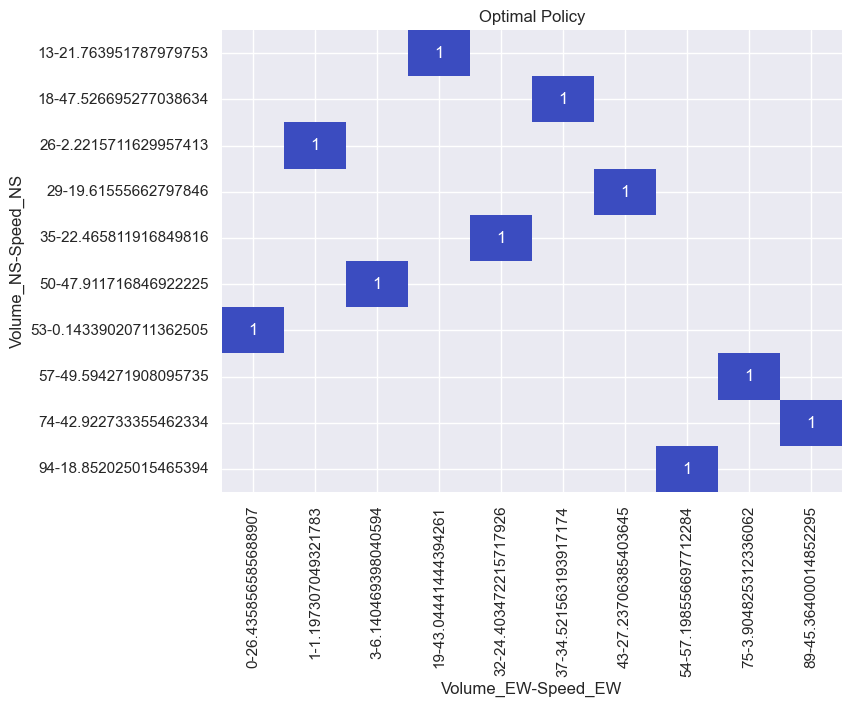

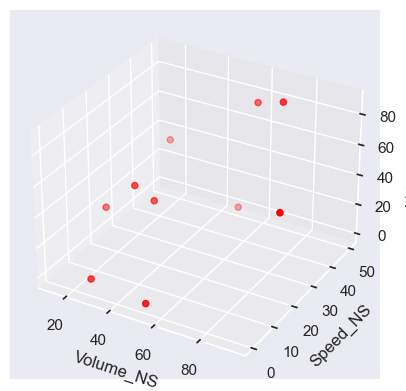

In [29]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = []
for i in range(10):
    volume_NS = random.randint(0, 100)
    speed_NS = random.uniform(0, 60)
    volume_EW = random.randint(0, 100)
    speed_EW = random.uniform(0, 60)
    data.append((volume_NS, speed_NS, volume_EW, speed_EW))

states = set(data)
actions = {'green for NS direction', 'green for EW direction'}

transitions = {}
for state in states:
    for action in actions:
        next_states = []
        if action == 'green for NS direction':
            for next_state in states:
                if next_state[0] >= state[0] and next_state[1] >= state[1] and next_state[2] <= state[2] and next_state[3] <= state[3]:
                    next_states.append(next_state)
            p = 1.0 / len(next_states) if len(next_states) > 0 else 0
            transitions[(state, action, next_state)] = p
        elif action == 'green for EW direction':
            for next_state in states:
                if next_state[2] >= state[2] and next_state[3] >= state[3] and next_state[0] <= state[0] and next_state[1] <= state[1]:
                    next_states.append(next_state)
            p = 1.0 / len(next_states) if len(next_states) > 0 else 0
            transitions[(state, action, next_state)] = p

rewards = {}
for state in states:
    for action in actions:
        next_states = []
        if action == 'green for NS direction':
            for next_state in states:
                if next_state[0] >= state[0] and next_state[1] >= state[1] and next_state[2] <= state[2] and next_state[3] <= state[3]:
                    next_states.append(next_state)
            for next_state in next_states:
                r = 10
                if next_state[2] > state[2] or next_state[3] > state[3]:
                    r -= 10
                r -= next_state[0] * 0.1
                r -= next_state[1] * 0.01
                rewards[(state, action, next_state)] = r
        elif action == 'green for EW direction':
            for next_state in states:
                if next_state[2] >= state[2] and next_state[3] >= state[3] and next_state[0] <= state[0] and next_state[1] <= state[1]:
                    next_states.append(next_state)
            for next_state in next_states:
                r = 10
                if next_state[0] > state[0] or next_state[1] > state[1]:
                    r -= 10
                r -= next_state[2] * 0.1
                r -= next_state[3] * 0.01
                rewards[(state, action, next_state)] = r

gamma = 0.8
convergence_threshold = 0.0001
V = {state: 0 for state in states}
while True:
    delta = 0
    for state in states:
        v = V[state]
        max_value = float('-inf')
        for action in actions:
            action_value = 0
            for next_state, probability in transitions.get((state, action), {}).items():
                action_value += probability * (rewards.get((state, action, next_state), 0) + gamma * V[next_state])
            if action_value > max_value:
                max_value = action_value
                best_action = action
        V[state] = max_value
        delta = max(delta, abs(v - V[state]))
    if delta < convergence_threshold:
        break

# Extract the optimal policy
policy = {}
for state in states:
    max_value = float('-inf')
    for action in actions:
        action_value = 0
        for next_state, probability in transitions.get((state, action), {}).items():
            action_value += probability * (rewards.get((state, action, next_state), 0) + gamma * V[next_state])
        if action_value > max_value:
            max_value = action_value
            best_action = action
    policy[state] = best_action

def get_optimal_action(volume_NS, volume_EW):
    max_value = float('-inf')
    best_action = None
    for speed_NS in np.linspace(0, 60, 11):
        for speed_EW in np.linspace(0, 60, 11):
            state = (volume_NS, speed_NS, volume_EW, speed_EW)
            if state in states:
                for action in actions:
                    action_value = 0
                    for next_state, probability in transitions.get((state, action), {}).items():
                        action_value += probability * (rewards.get((state, action, next_state), 0) + gamma * V[next_state])
                    if action_value > max_value:
                        max_value = action_value
                        best_action = action

# Example usage:50
print("Optimal action for volume (NS=30, EW=50):", get_optimal_action(50,30 ))

# Create a DataFrame to represent the optimal policy
df = pd.DataFrame(index=range(10), columns=['Volume_NS', 'Speed_NS', 'Volume_EW', 'Speed_EW', 'Optimal Action'])
for i, state in enumerate(states):
    df.loc[i, 'Volume_NS'] = state[0]
    df.loc[i, 'Speed_NS'] = state[1]
    df.loc[i, 'Volume_EW'] = state[2]
    df.loc[i, 'Speed_EW'] = state[3]
    df.loc[i, 'Optimal Action'] = policy[state]

action_map = {'green for NS direction': 0, 'green for EW direction': 1}
df['Optimal Action'] = df['Optimal Action'].map(action_map)

pivot = df.pivot_table(values='Optimal Action', index=['Volume_NS', 'Speed_NS'], columns=['Volume_EW', 'Speed_EW'])

sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, cbar=False)
plt.title('Optimal Policy')
plt.show()

# Create a 3D scatter plot
x = df['Volume_NS']
y = df['Speed_NS']
z = df['Volume_EW']
w = df['Speed_EW']
colors = ['green' if a == 'green for NS direction' else 'red' for a in df['Optimal Action']]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors)

ax.set_xlabel('Volume_NS')
ax.set_ylabel('Speed_NS')
ax.set_zlabel('Volume_EW')

plt.show()
